# Descrobtion
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Matrix column entries (attributes):

1. Rank - Ranking of overall sales

2.  Name - The games name

3.  Platform - Platform of the games release (i.e. PC,PS4, etc.)

4. Year - Year of the game's release

5. Genre - Genre of the game

6. Publisher - Publisher of the game

7. NA_Sales - Sales in North America (in millions)

8. EU_Sales - Sales in Europe (in millions)

9. JP_Sales - Sales in Japan (in millions)

10. Other_Sales - Sales in the rest of the world (in millions)

11. Global_Sales - Total worldwide sales.

















# Lib

In [ ]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go


# ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


#ML models
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Preview Data

In [ ]:
df=pd.read_csv('/content/vgsales.csv')
df.head()
df.shape

(16598, 11)

 Get the features and labels from the DataFrame (dataset). The features are all the columns except ‘status’, and the labels are those in the ‘status’ column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Check duplication

In [ ]:
len(df)-len(df.drop_duplicates())

0

# Data Preprocessing

In [ ]:
# null values are little so i will drop them
df.dropna(inplace=True)
df['Year']=df['Year'].astype(int)


In [ ]:
df.describe()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



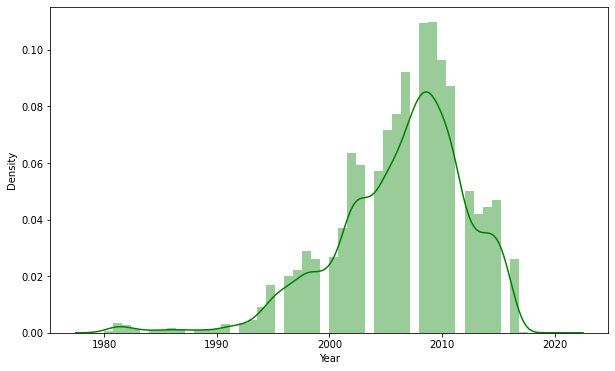

In [ ]:
ax=plt.figure(figsize=(10,6))
sns.distplot(df['Year'],color='green')

2009 has the highest numberof game releases



-------------------------------------------------------------

**Sales of different genre in North America**

Text(0.5, 1.0, 'Sales of different genre in North America')

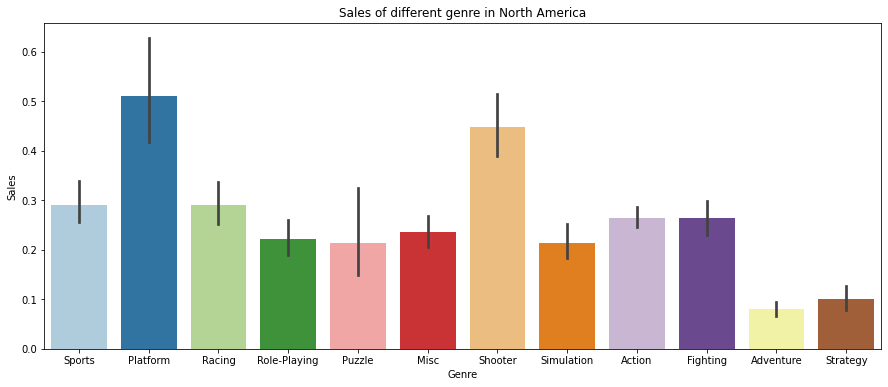

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='NA_Sales',data=df,palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in North America')

Platform and shooter games are the most played game genre in North America

---------------------------------------------------------

**Sales of different genre in Europe**

Text(0.5, 1.0, 'Sales of different genre in Europe')

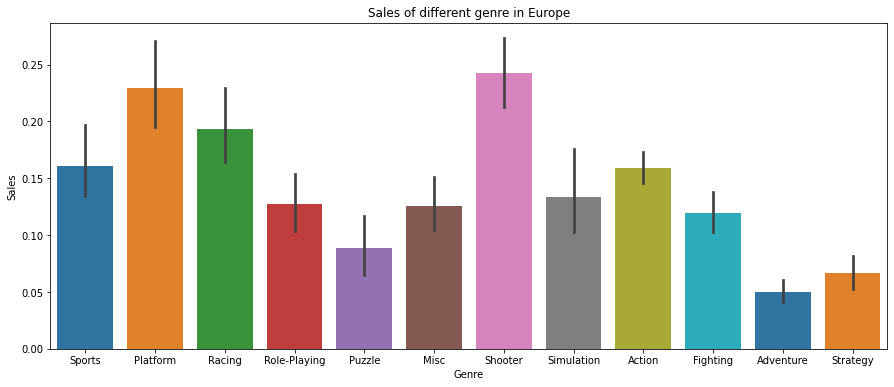

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='EU_Sales',data=df,palette='tab10')
plt.ylabel('Sales')
plt.title('Sales of different genre in Europe')

Platform and shooter games are the most played game genre in Europe



---------------------------------------------------------------

**Sales of different genre in Japan**

Text(0.5, 1.0, 'Sales of different genre in Japan')

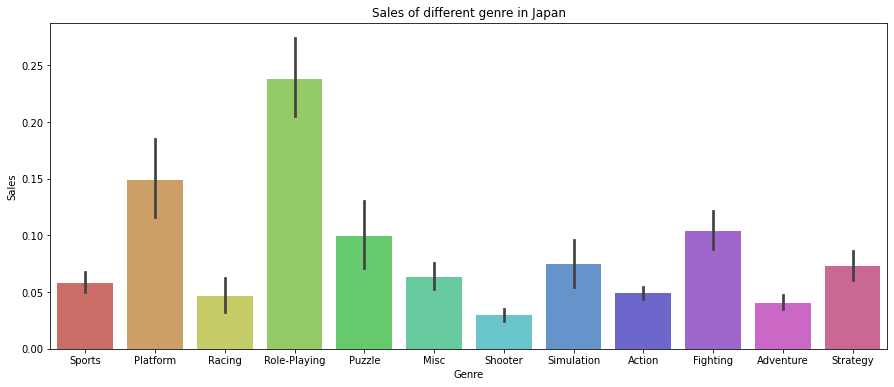

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='JP_Sales',data=df,palette='hls')
plt.ylabel('Sales')
plt.title('Sales of different genre in Japan')

Role play games are highly played in Japan



------------------------------------------------------------

**Sales of different genre in other Regions**

Text(0.5, 1.0, 'Sales of different genre in other Regions')

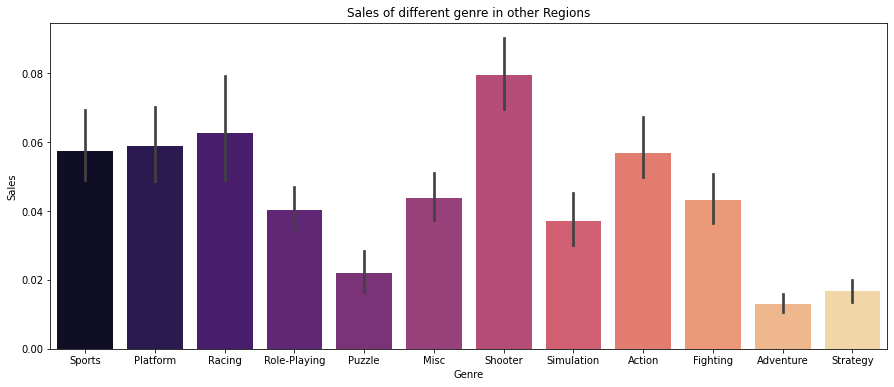

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='Other_Sales',data=df,palette='magma')
plt.ylabel('Sales')
plt.title('Sales of different genre in other Regions')

**Sales of different genre Globally**

Text(0.5, 1.0, 'Sales of different genre Globally')

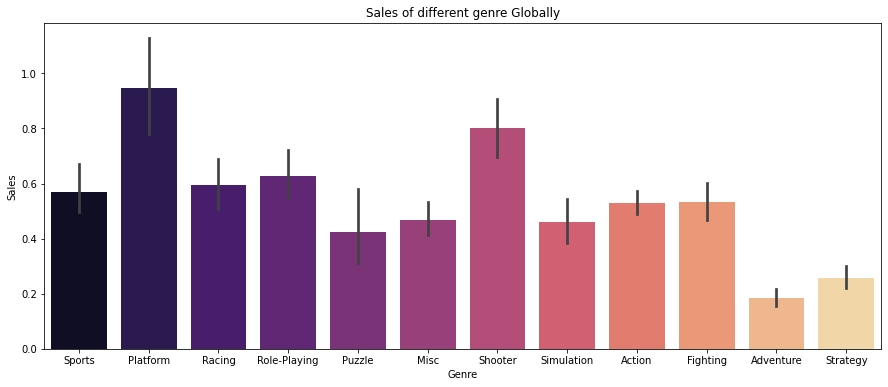

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='Global_Sales',data=df,palette='magma')
plt.ylabel('Sales')
plt.title('Sales of different genre Globally')

Platform and shooter games are the most played game genre Globally



---------------------------------------

Frequency of different Genre



Text(0.5, 1.0, 'Frequency of different Genre')

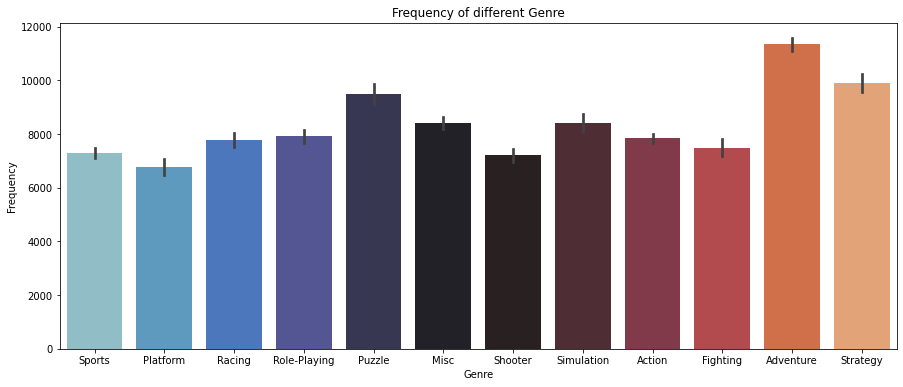

In [ ]:
a=np.arange(1,16292)
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y=a,data=df,palette='icefire')
plt.ylabel('Frequency')
plt.title('Frequency of different Genre')

Adventure and strategy games are the highest in the dataset



------------------------------------------------------

Global Sales over the years



Text(0.5, 1.0, 'Global Sales over the years')

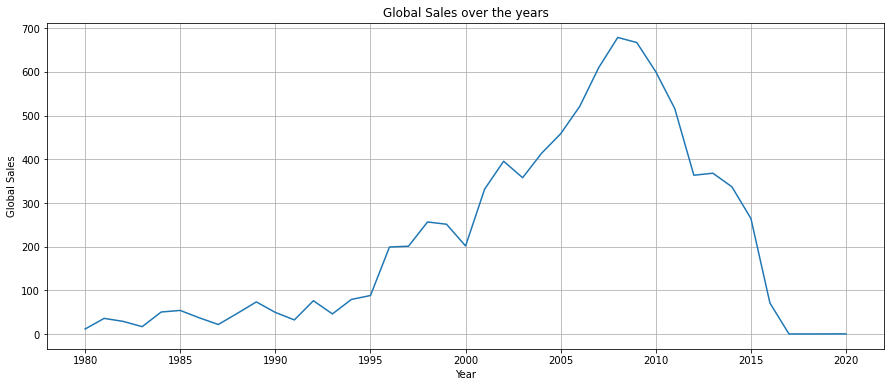

In [ ]:
ax=plt.figure(figsize=(15,6))
df.groupby(['Year'])['Global_Sales'].sum().plot()
plt.grid()
plt.ylabel('Global Sales')
plt.title('Global Sales over the years')

Highest sales have been recorded from 2007 to 2010



----------------------------------------------------------

Sales of games in different platforms globally



Text(0.5, 1.0, 'Sales of games in different platforms globally')

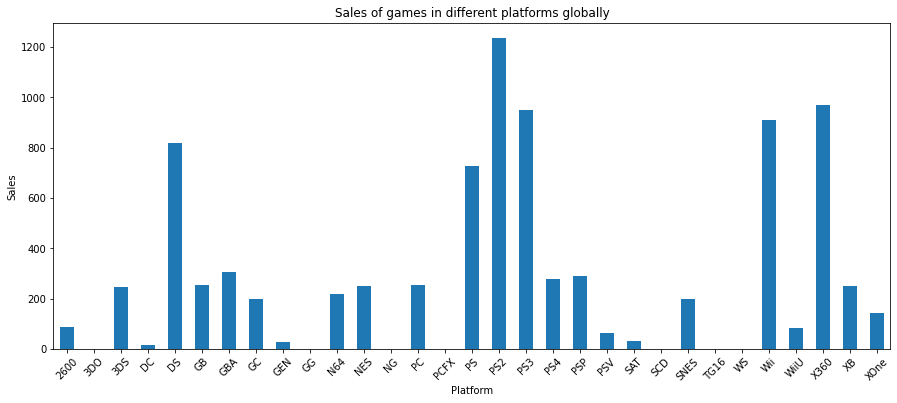

In [ ]:
ax=plt.figure(figsize=(15,6))
df.groupby(['Platform'])['Global_Sales'].sum().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.title('Sales of games in different platforms globally')

PS2 has recorded highest sales globally



----------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



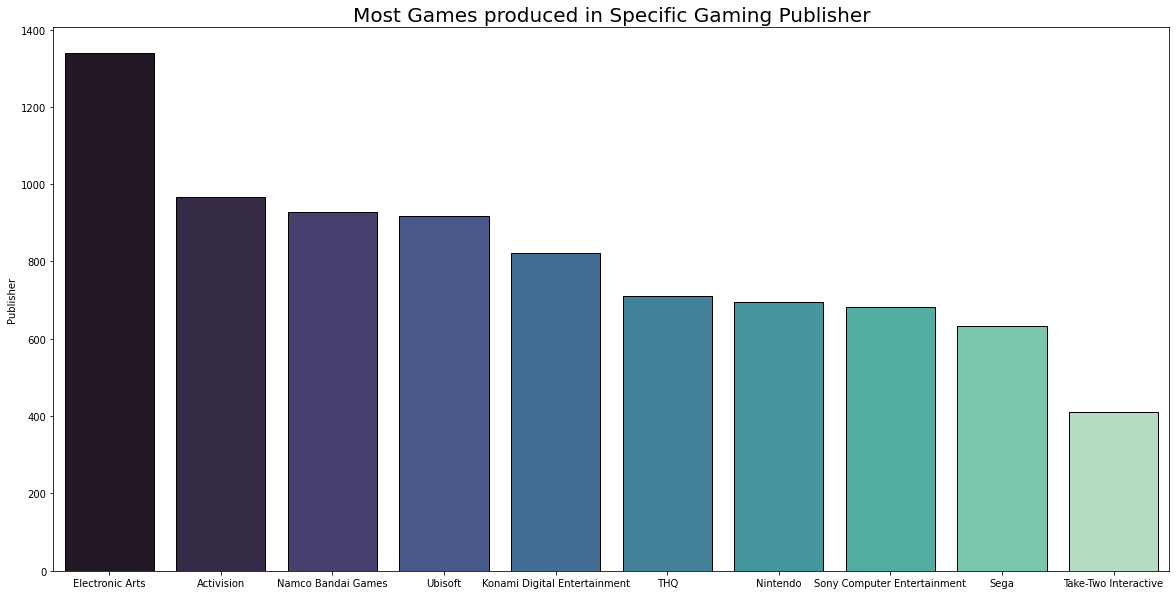

In [ ]:
top10=df["Publisher"].value_counts().index
plt.figure(figsize = (20,10))
sns.barplot(top10[:10], df["Publisher"].value_counts().iloc[:10]
           ,palette='mako'
           ,edgecolor='black'
           )
plt.title("Most Games produced in Specific Gaming Publisher",fontsize=20)
plt.show()

Top 10 Publisher in order and most is Electronic Arts

------------------------------------------------------------------

Distribution of Top Seller 50 Games by Publishers¶


In [ ]:
Top50byPublisher = df.nlargest(50, 'Global_Sales')[['Global_Sales', 'Name', 'Publisher']]
Top50byPublisher = Top50byPublisher.groupby(pd.Grouper(key='Publisher')).size().reset_index(name='Number of Games')
Top50byPublisher

,Publisher,Number of Games
0,Nintendo,32
1,Microsoft Game Studios,2
2,Take-Two Interactive,6
3,Sony Computer Entertainment,2
4,Activision,8


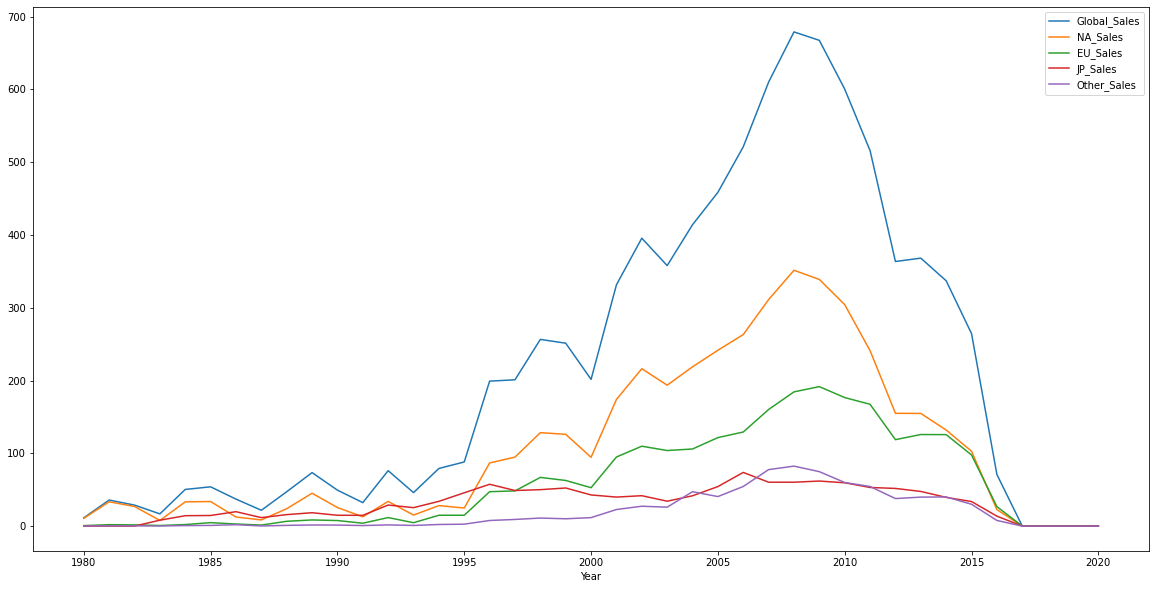

In [ ]:
GSales_Year = df.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
GSales_Year.plot(figsize = (20,10))

1. most of sales between 2005 and 2010
2. lest sales in 1980 to 1990



------------------------------------------

Playstation vs PC Global Sales Comparison¶


In [ ]:
PS = df[df['Platform'] == 'PS'].groupby('Year')['Global_Sales'].sum().reset_index()
PS2 = df[df['Platform'] == 'PS2'].groupby('Year')['Global_Sales'].sum().reset_index()
PS3 = df[df['Platform'] == 'PS3'].groupby('Year')['Global_Sales'].sum().reset_index()
PS4 = df[df['Platform'] == 'PS4'].groupby('Year')['Global_Sales'].sum().reset_index()
PC = df[df['Platform'] == 'PC'].groupby('Year')['Global_Sales'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=PS['Year'], y=PS['Global_Sales'],
                         name="PS Sales",
                         hovertext=PS['Global_Sales']))

fig.add_trace(go.Scatter(x=PS2['Year'], y=PS2['Global_Sales'],
                         name="PS2 Sales",
                         hovertext=PS2['Global_Sales']))

fig.add_trace(go.Scatter(x=PS2['Year'], y=PS2['Global_Sales'],
                         name="PS2 Sales",
                         hovertext=PS2['Global_Sales']))

fig.add_trace(go.Scatter(x=PS3['Year'], y=PS3['Global_Sales'],
                         name="PS3 Sales",
                         hovertext=PS3['Global_Sales']))

fig.add_trace(go.Scatter(x=PS4['Year'], y=PS4['Global_Sales'],
                         name="PS4 Sales",
                         hovertext=PS4['Global_Sales']))

fig.add_trace(go.Scatter(x=PC['Year'], y=PC['Global_Sales'],
                         name="PC Sales",
                         hovertext=PC['Global_Sales']))

fig.update_layout(title_text='Playstation vs PC Global Sales Comparison',
                  title_x=0.5, title_font=dict(size=22))  
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Global Sales (M)")

fig.show()

----------------------------------------------------------------------------------------------

# Dealing with Outliers

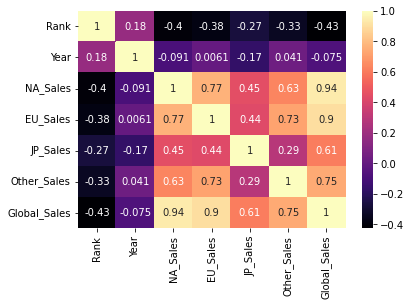

In [ ]:
dfcopy=df.corr() 

sns.heatmap(dfcopy ,annot = True, cmap="magma")

Rank               AxesSubplot(0.125,0.657941;0.133621x0.222059)
Year            AxesSubplot(0.285345,0.657941;0.133621x0.222059)
NA_Sales         AxesSubplot(0.44569,0.657941;0.133621x0.222059)
EU_Sales        AxesSubplot(0.606034,0.657941;0.133621x0.222059)
JP_Sales        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Other_Sales        AxesSubplot(0.125,0.391471;0.133621x0.222059)
Global_Sales    AxesSubplot(0.285345,0.391471;0.133621x0.222059)
dtype: object

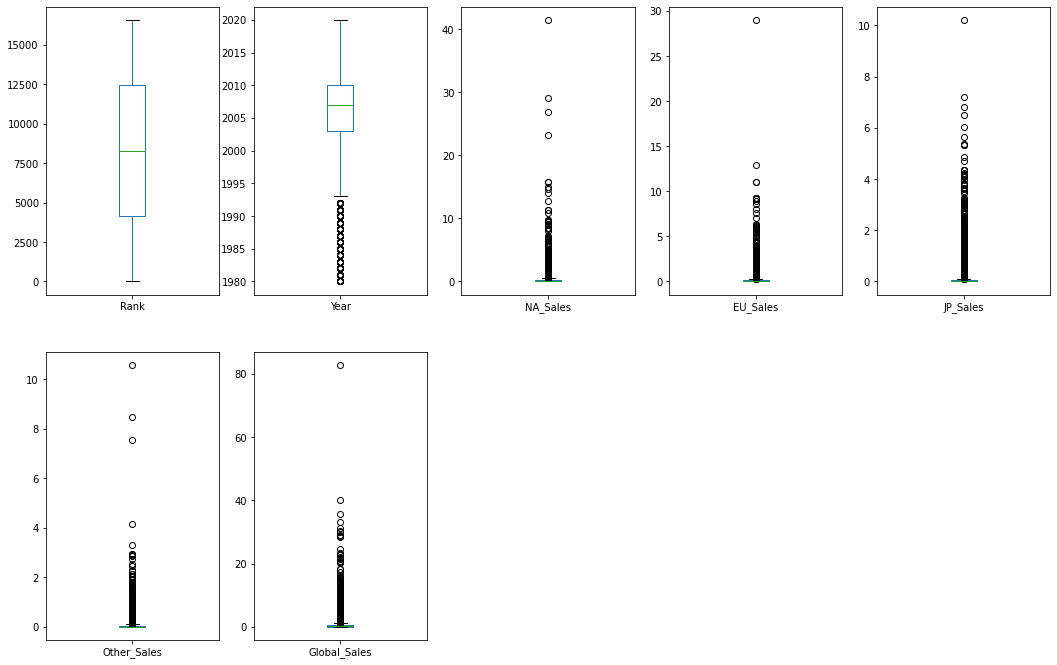

In [ ]:

df.plot(kind = "box" , subplots = True , figsize = (18,18), layout = (3,5))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0.0, 30.47140487188924)

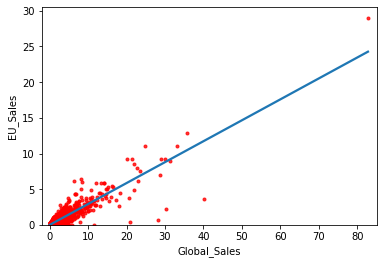

In [ ]:
g = sns.regplot(df.Global_Sales,df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

In [ ]:
df = df.drop([0],axis=0) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0.0, 13.52411103334368)

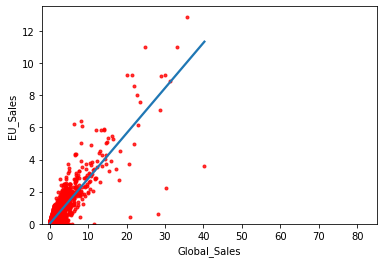

In [ ]:
g = sns.regplot(df.Global_Sales,df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

---------------------------------------------------------------

# Label Encoding and prepare X and y

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


# 

In [ ]:
from sklearn.preprocessing import LabelEncoder

dff = df.copy()

le = LabelEncoder()

feature = ["Platform", "Genre"]


for col in feature:
    dff[col] = le.fit_transform(df[col])
    

In [ ]:
dff.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,11,1985,4,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,2008,6,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,2009,10,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,1996,7,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,5,1989,5,Nintendo,23.20,2.26,4.22,0.58,30.26


---------------------------------------------------

In [ ]:
X = dff[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = dff['Global_Sales'].values

# Train | Test

In [ ]:
X.shape

(16290, 6)

In [ ]:
y.shape

(16290,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
ro = RobustScaler()

In [ ]:
x_train = ro.fit_transform(x_train)
x_test = ro.fit_transform(x_test)


# Modeling

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report, roc_curve

**Decsion Tree**

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)




DecisionTreeRegressor()

In [ ]:
regressor.score(x_train,y_train)

0.9999977849831169

In [ ]:
regressor.score(x_test,y_test)


0.9556775049988334

In [ ]:
yTreePre= regressor.predict(x_test)

In [ ]:
r2Tree= r2_score(y_test ,yTreePre )
r2Tree

0.9556775049988334

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yTreePre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.04934610770416204


In [ ]:
db = pd.DataFrame({'Actual': y_test, 'Predicted': yTreePre})
db

,Actual,Predicted
0,0.57,0.550000
1,0.02,0.020000
2,0.33,0.320000
3,0.67,0.600000
4,0.15,0.155000
...,...,...
4068,0.05,0.043333
4069,0.23,0.240000
4070,2.20,2.270000
4071,0.19,0.190000


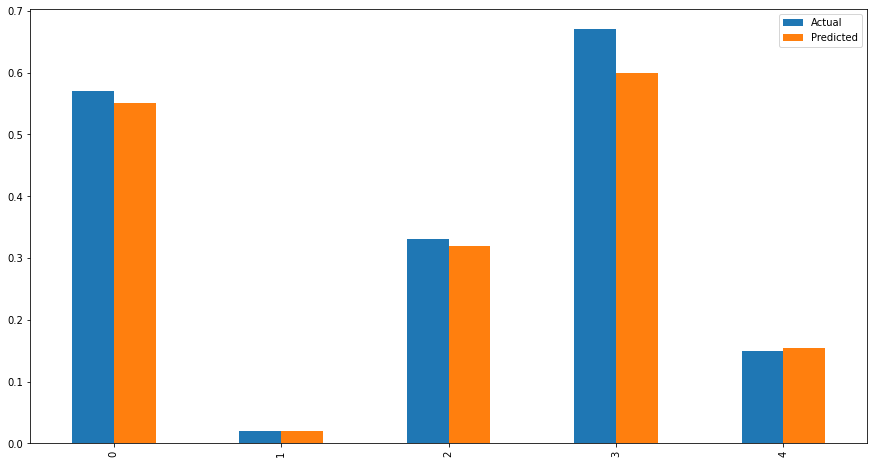

In [ ]:
db1 = db.head()
db1.plot(kind='bar',figsize=(15,8))
plt.show()

------------------------------------------

**Ridge**

In [ ]:
rid = Ridge()
rid.fit(x_train,y_train)

Ridge()

In [ ]:
rid.score(x_train,y_train)

0.9999861192147286

In [ ]:
rid.score(x_test,y_test)

0.999987986050178

In [ ]:
yRidPre = rid.predict(x_test)

In [ ]:
r2Rid = r2_score(y_test ,yRidPre )
r2Rid

0.999987986050178

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yRidPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.0029551375102583304


In [ ]:
dbRidge = pd.DataFrame({'Actual': y_test, 'Predicted': yRidPre})
dbRidge

,Actual,Predicted
0,0.57,0.570265
1,0.02,0.020326
2,0.33,0.320226
3,0.67,0.670218
4,0.15,0.150223
...,...,...
4068,0.05,0.040200
4069,0.23,0.240351
4070,2.20,2.200274
4071,0.19,0.190430


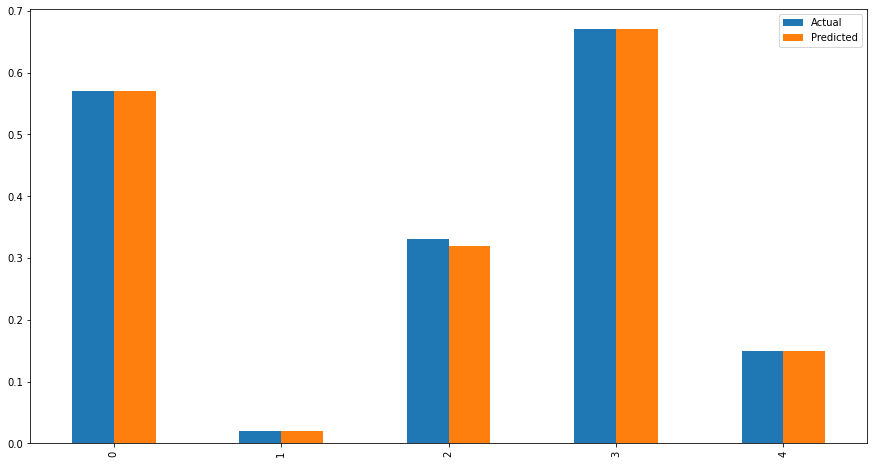

In [ ]:
dbridge1 = dbRidge.head()
dbridge1.plot(kind='bar',figsize=(15,8))
plt.show()

--------------------------------------------------------

**LinearRegression**

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_train,y_train)

0.9999861192562169

In [ ]:
lr.score(x_test,y_test)

0.9999879850329042

In [ ]:
yLinearPre = lr.predict(x_test)

In [ ]:
r2Linear = r2_score(y_test , yLinearPre)
r2Linear

0.9999879850329042

<Figure size 1152x576 with 0 Axes>

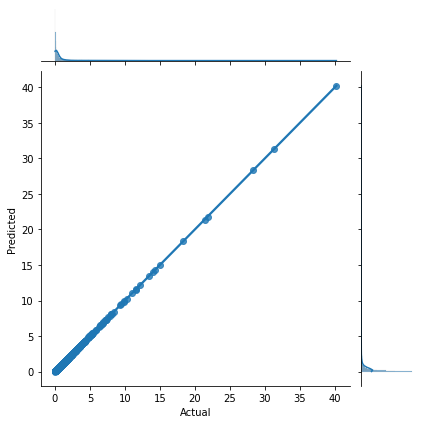

In [ ]:
test = pd.DataFrame({'Predicted':yLinearPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
#plt.plot(test[:50])
#plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yLinearPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.0029547715225954007


In [ ]:
dbLinear = pd.DataFrame({'Actual': y_test, 'Predicted': yLinearPre})
dbLinear

,Actual,Predicted
0,0.57,0.570270
1,0.02,0.020324
2,0.33,0.320229
3,0.67,0.670215
4,0.15,0.150223
...,...,...
4068,0.05,0.040197
4069,0.23,0.240351
4070,2.20,2.200280
4071,0.19,0.190427


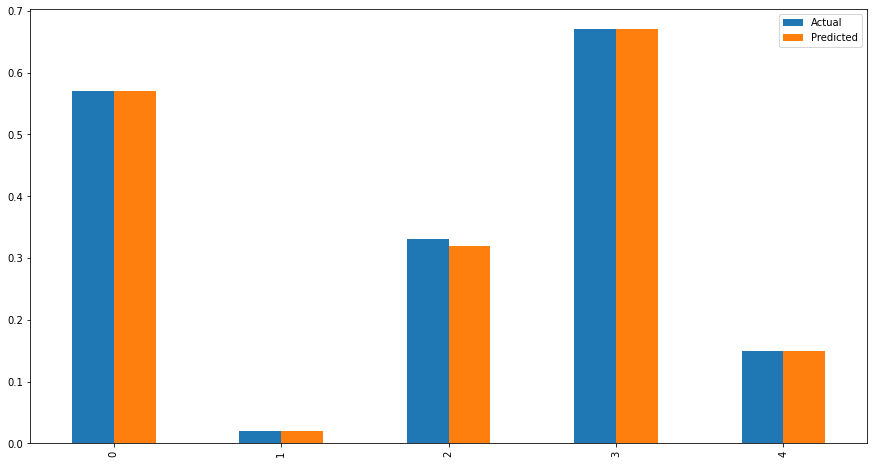

In [ ]:
dbLinear1 = dbLinear.head()
dbLinear1.plot(kind='bar',figsize=(15,8))
plt.show()

-----------------------------------------------

**RandomForestRegressor**

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train , y_train)

RandomForestRegressor()

In [ ]:
rf.score(x_train,y_train)

0.9970626407113404

In [ ]:
rf.score(x_test,y_test)

0.9605823688817124

In [ ]:
yRandomPre= rf.predict(x_test)

In [ ]:
r2Random = r2_score(y_test , yRandomPre)
r2Random

0.9605823688817124

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yRandomPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.030808683220640176


In [ ]:
dbRandom = pd.DataFrame({'Actual': y_test, 'Predicted': yRandomPre})
dbRandom

,Actual,Predicted
0,0.57,0.567700
1,0.02,0.020000
2,0.33,0.320900
3,0.67,0.648500
4,0.15,0.154700
...,...,...
4068,0.05,0.044202
4069,0.23,0.239500
4070,2.20,2.240100
4071,0.19,0.190000


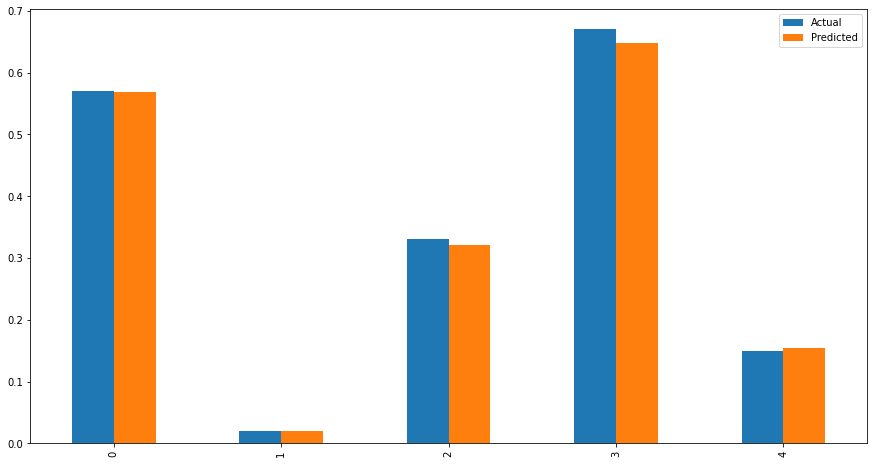

In [ ]:
dbRandom1 = dbRandom.head()
dbRandom1.plot(kind='bar',figsize=(15,8))
plt.show()

----------------------------------------------------------------

**KNN**

In [ ]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
knn.score(x_train,y_train)

0.9830286155722257

In [ ]:
knn.score(x_test , y_test)

0.9134505144593599

In [ ]:
pred = knn.predict(x_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.9134505144593599


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(pred, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.046915295850724285


In [ ]:
dbKNN = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
dbKNN

,Actual,Predicted
0,0.57,0.560
1,0.02,0.020
2,0.33,0.320
3,0.67,0.578
4,0.15,0.150
...,...,...
4068,0.05,0.022
4069,0.23,0.254
4070,2.20,2.180
4071,0.19,0.190


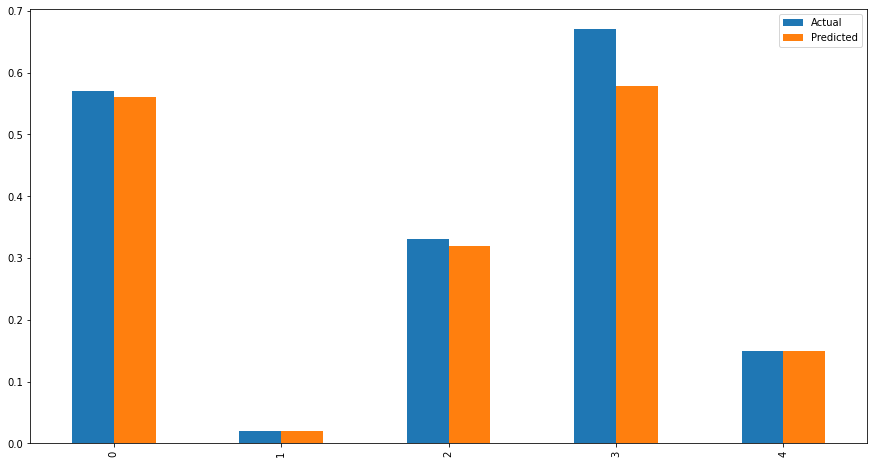

In [ ]:
dbKNN1 = dbKNN.head()
dbKNN1.plot(kind='bar',figsize=(15,8))
plt.show()

--------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from scipy import stats
m = sm.add_constant(X)
est=sm.OLS(y,m)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.032e+08
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:16:55   Log-Likelihood:                 62487.
No. Observations:               16290   AIC:                        -1.250e+05
Df Residuals:                   16283   BIC:                        -1.249e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      4.638      0.0